In [1]:
library("rwwa")

Loading required package: extRemes

Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot




# Compute SPEI


In [1]:
suppressMessages(library(SPEI))

In [3]:
sapply(c("mswep", "chirps"), function(ds) {
    df = read.csv(paste0("data/", ds, "_ts_monthly.csv"))
    df_ts <- ts(df$pr, start = sapply(strsplit(df$time[1], "-")[[1]], as.integer)[1:2], frequency = 12)
    res_df <- sapply(c(1,3,6,12,24), function(nm) {
        spi_m <- spi(df_ts, scale = nm, ref.start = c(1990,1), ref.end = c(2020,12))
        spi_m$fitted
    })
    write.csv(setNames(data.frame(df$time, res_df), c("time", "spi_1", "spi_3", "spi_6", "spi_12", "spi_24")), file = paste0("data/",ds,"_spi-monthly.csv"), row.names = F)
})

$mswep
NULL

$chirps
NULL

---
# Fitted models

## Wet-season precipitation

In [20]:
chirps <- load_ts("ts/panama_pr-wetseason_chirps.dat", col.names = c("year", "pr"))
mswep <- load_ts("ts/panama_pr-wetseason_mswep.dat", col.names = c("year", "pr"))

In [21]:
gmst <- read.table("ts/gmst.dat", col.names = c("year", "gmst"))

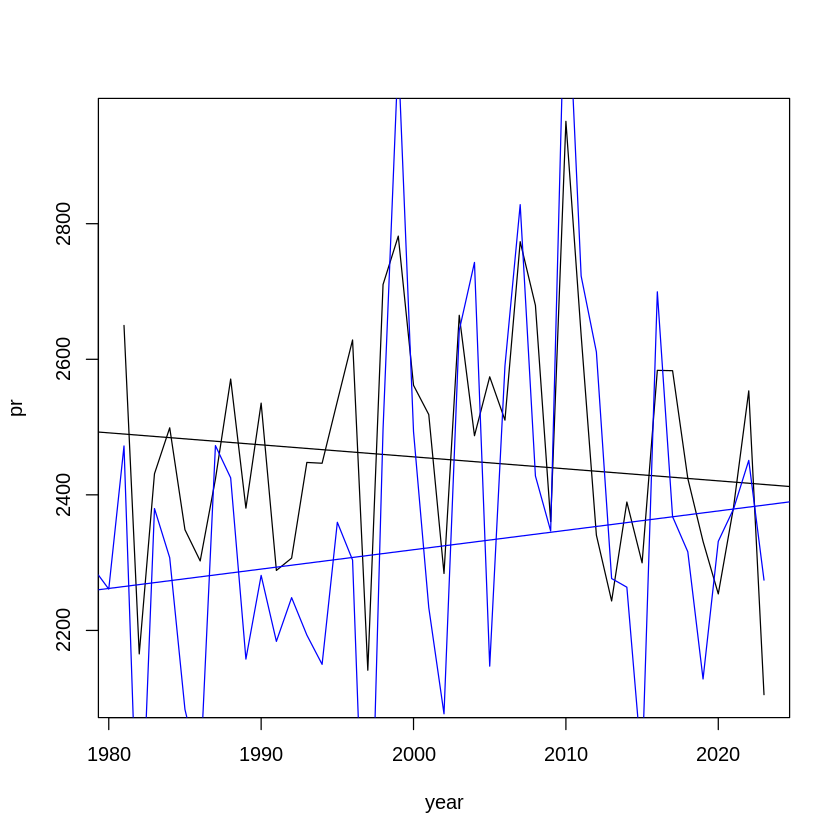

In [26]:
plot(chirps, type = "l")
abline(line(chirps$year, chirps$pr))

lines(mswep, col = "blue")
abline(line(mswep$year, mswep$pr), col = "blue")


In [23]:
ablineline(chirps$year, chirps$pr)


Call:
line(chirps$year, chirps$pr)

Coefficients:
[1]  5997.693    -1.771


## Dry-season precipitation

In [27]:
chirps <- load_ts("ts/panama_pr-dryseason_chirps.dat", col.names = c("year", "pr"))
mswep <- load_ts("ts/panama_pr-dryseason_mswep.dat", col.names = c("year", "pr"))

In [28]:
gmst <- read.table("ts/gmst.dat", col.names = c("year", "gmst"))

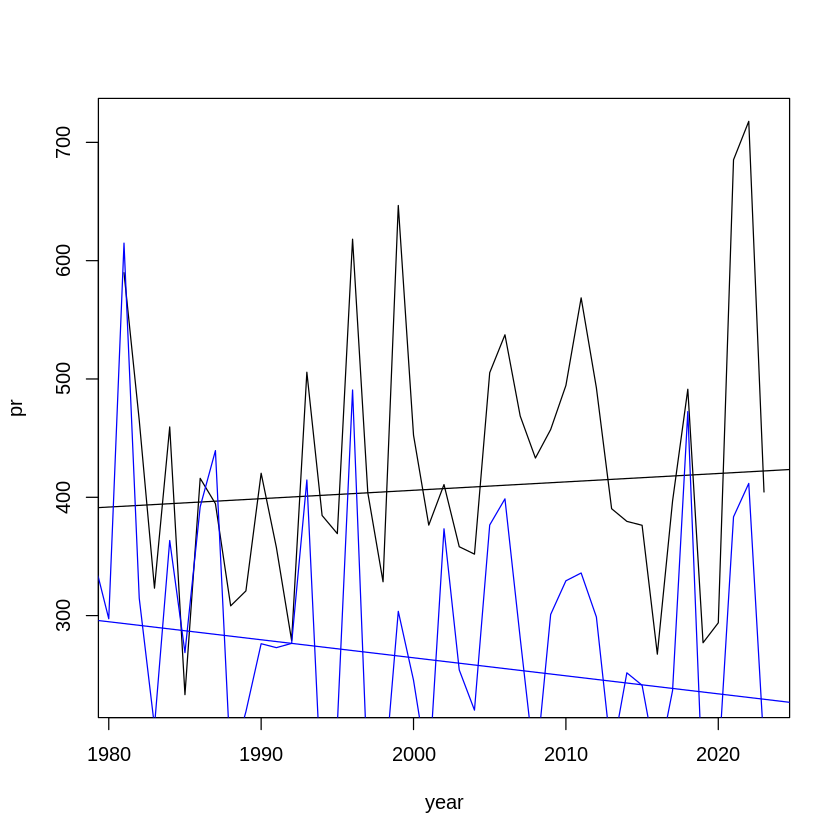

In [29]:
plot(chirps, type = "l")
abline(line(chirps$year, chirps$pr))

lines(mswep, col = "blue")
abline(line(mswep$year, mswep$pr), col = "blue")
